<h1>TASK 3</h1>

<a name='000'></a>

<h2>Content</h2>

<ul>
    <ol type='1'>
    <li><a href='#001'>Environment Configuration</a></li>
    <li><a href='#002'>Implementing Logistic Regression Method</a></li>
    <li><a href='#003'>Implementing Gradient Descent Method</a></li>
    <li><a href='#004'>Implementing Stochastic Gradient Descent Method</a></li>
    <li><a href='#005'>Implementing Adam Optimization Method</a></li>
    <li><a href='#006'>Plotting Learning Rate Curves</a></li>
    </ol>
</ul>

<a name='001'></a>

<h2>Environment Configuration</h2>

Importing environment.

In [1]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

<a name='002'></a>

<h2>Implementing Logistic Regression Method</h2>

Data loading.

>`activity` — target.
>
>`d1` ... `d1776` — predictors.

In [2]:
df = pd.read_csv('bioresponse.csv')
df.rename(str.lower, axis='columns', inplace=True)
df.head()

,activity,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d1767,d1768,d1769,d1770,d1771,d1772,d1773,d1774,d1775,d1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


Data splitting into training and test sets.

In [3]:
train_set, test_set = train_test_split(df, train_size=0.75, shuffle=True)

train_x = train_set.iloc[:, 1:].T.to_numpy()
train_y = train_set.iloc[:, :1].T.to_numpy()

test_x = test_set.iloc[:, 1:].T.to_numpy()
test_y = test_set.iloc[:, :1].T.to_numpy()

Size checking.

In [4]:
print('Training Set')
print('X size: {}, Y size: {}'.format(train_x.shape, train_y.shape))
print('Test Set')
print('X size: {}, Y size: {}'.format(test_x.shape, test_y.shape))

Training Set
X size: (1776, 2813), Y size: (1, 2813)
Test Set
X size: (1776, 938), Y size: (1, 938)


Building function to initialize activation function.

In [5]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

Building function to initialize parameters of the model.

In [6]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

Building function to initialize backpropagation.

In [7]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    
    cost = -(1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)
    
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y, axis=1)
    
    grads = {'dw': dw, 'db': db}
    return grads, cost

Building function to evaluate the model.

In [8]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        if (A[0, i] <= 0.5):
            Y_prediction[0][i] = 0
        else:
            Y_prediction[0][i] = 1
    return Y_prediction

Building function to compile `Logistic Regression` model.

In [9]:
def model(X_train, Y_train, X_test, Y_test, optimizer, num_iterations=2000, learning_rate=0.5, print_cost=True):
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimizer(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters['w']
    b = parameters['b']
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print('Train Accuracy: {:.0f}%'.format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print('Test Accuracy: {:.0f}%'.format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    output = {'costs': costs,
              'prediction_test': Y_prediction_test,
              'prediction_train': Y_prediction_train,
              'w': w,
              'b': b,
              'learning_rate': learning_rate,
              'num_iterations': num_iterations}
    return output

<a name='003'></a>

<h2>Implementing Gradient Descent Method</h2>

Implementing `Gradient Descent` optimization algorithm.

In [10]:
def GD(w, b, X, Y, num_iterations, learning_rate, print_cost=True):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost[0])
        
        if print_cost and i % 100 == 0:
            print('Cost after {} iteration: {:.4f}'.format(i, cost[0]))
    
    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}
    return params, grads, costs

<a name='004'></a>

<h2>Implementing Stochastic Gradient Descent Method</h2>

Implementing `Stochastic Gradient Descent` optimization algorithm.

In [11]:
def SGD(w, b, X, Y, num_iterations, learning_rate, print_cost=True, batch_size=64):
    costs = []
    
    for i in range(num_iterations):
        for start in range(0, X.shape[1], batch_size):
            stop = start + batch_size
            
            X_batch = X[:, start:stop]
            Y_batch = Y[:, start:stop]
            
            grads, cost = propagate(w, b, X_batch, Y_batch)
            
            dw = grads['dw']
            db = grads['db']
            
            w -= learning_rate * dw
            b -= learning_rate * db
        
        _, cost = propagate(w, b, X, Y)
        if i % 100 == 0:
            costs.append(cost[0])
        
        if print_cost and i % 100 == 0:
            print('Cost after {} iteration: {:.4f}'.format(i, cost[0]))
    
    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}
    return params, grads, costs

<a name='005'></a>

<h2>Implementing Adam's Optimization Method</h2>

Implementing `Adam's` optimization algorithm.

In [12]:
def Adam(w, b, X, Y, num_iterations, learning_rate, print_cost=True, beta1=0.9, beta2=0.999, bias=0.00000001):
    costs = []
    moment_b1_w = 0
    moment_b2_w = 0
    moment_b1_b = 0
    moment_b2_b = 0
    iteration = 1
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        moment_b1_w = (beta1 * moment_b1_w) + ((1 - beta1) * dw)
        moment_b1_b = (beta1 * moment_b1_b) + ((1 - beta1) * db)
        
        moment_b2_w = (beta2 * moment_b2_w) + ((1 - beta2) * (dw ** 2))
        moment_b2_b = (beta2 * moment_b2_b) + ((1 - beta2) * (db ** 2))
        
        biased_b1_w = moment_b1_w / (1 - np.power(beta1, iteration))
        biased_b1_b = moment_b1_b / (1 - np.power(beta1, iteration))
        biased_b2_w = moment_b2_w / (1 - np.power(beta1, iteration))
        biased_b2_b = moment_b2_b / (1 - np.power(beta1, iteration))
        
        w -= learning_rate * biased_b1_w / (np.sqrt(biased_b2_w) + bias)
        b -= learning_rate * biased_b1_b / (np.sqrt(biased_b2_b) + bias)
        
        if i % 100 == 0:
            costs.append(cost[0])
        
        if print_cost and i % 100 == 0:
            print('Cost after {} iteration: {:.4f}'.format(i, cost[0]))
        iteration = iteration + 1
    
    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}
    return params, grads, costs

<a name='006'></a>

<h2>Plotting Learning Rate Curves</h2>

Training `Logistic Regression` model using `Gradient Descent` optimization algorithm.

In [13]:
output_gd = model(train_x, train_y, test_x, test_y, optimizer=GD, learning_rate=0.001, print_cost=True)

Cost after 0 iteration: 0.6931
Cost after 100 iteration: 0.6800
Cost after 200 iteration: 0.6727
Cost after 300 iteration: 0.6663
Cost after 400 iteration: 0.6604
Cost after 500 iteration: 0.6549
Cost after 600 iteration: 0.6497
Cost after 700 iteration: 0.6448
Cost after 800 iteration: 0.6403
Cost after 900 iteration: 0.6359
Cost after 1000 iteration: 0.6318
Cost after 1100 iteration: 0.6280
Cost after 1200 iteration: 0.6243
Cost after 1300 iteration: 0.6207
Cost after 1400 iteration: 0.6174
Cost after 1500 iteration: 0.6141
Cost after 1600 iteration: 0.6111
Cost after 1700 iteration: 0.6081
Cost after 1800 iteration: 0.6053
Cost after 1900 iteration: 0.6025
Train Accuracy: 72%
Test Accuracy: 69%


Training `Logistic Regression` model using `Stochastic Gradient Descent` optimization algorithm.

In [14]:
output_sgd = model(train_x, train_y, test_x, test_y, optimizer=SGD, learning_rate=0.001, print_cost=True)

Cost after 0 iteration: 0.6854
Cost after 100 iteration: 0.5554
Cost after 200 iteration: 0.5156
Cost after 300 iteration: 0.4938
Cost after 400 iteration: 0.4796
Cost after 500 iteration: 0.4692
Cost after 600 iteration: 0.4611
Cost after 700 iteration: 0.4545
Cost after 800 iteration: 0.4490
Cost after 900 iteration: 0.4442
Cost after 1000 iteration: 0.4399
Cost after 1100 iteration: 0.4361
Cost after 1200 iteration: 0.4326
Cost after 1300 iteration: 0.4295
Cost after 1400 iteration: 0.4265
Cost after 1500 iteration: 0.4238
Cost after 1600 iteration: 0.4213
Cost after 1700 iteration: 0.4189
Cost after 1800 iteration: 0.4167
Cost after 1900 iteration: 0.4146
Train Accuracy: 82%
Test Accuracy: 77%


Training `Logistic Regression` model using `Adam's` optimization algorithm.

In [15]:
output_adam = model(train_x, train_y, test_x, test_y, optimizer=Adam, learning_rate=0.001, print_cost=True)

Cost after 0 iteration: 0.6931
Cost after 100 iteration: 0.4255
Cost after 200 iteration: 0.3881
Cost after 300 iteration: 0.3667
Cost after 400 iteration: 0.3515
Cost after 500 iteration: 0.3396
Cost after 600 iteration: 0.3299
Cost after 700 iteration: 0.3215
Cost after 800 iteration: 0.3142
Cost after 900 iteration: 0.3077
Cost after 1000 iteration: 0.3018
Cost after 1100 iteration: 0.2965
Cost after 1200 iteration: 0.2915
Cost after 1300 iteration: 0.2869
Cost after 1400 iteration: 0.2827
Cost after 1500 iteration: 0.2787
Cost after 1600 iteration: 0.2749
Cost after 1700 iteration: 0.2713
Cost after 1800 iteration: 0.2679
Cost after 1900 iteration: 0.2646
Train Accuracy: 90%
Test Accuracy: 75%


Building function to visualize results.

In [16]:
def plot_loss(a, b, c):
    figure, ax = plt.subplots(1, 3, figsize=(20, 5))
    sns.set_theme(style='whitegrid', palette='pastel')
    
    ax[0] = sns.lineplot(data=a, ax=ax[0])
    ax[0].set(xlabel='Iteration')
    ax[0].set(ylabel='Loss')
    ax[0].set_title('Gradient Descent')
    
    ax[1] = sns.lineplot(data=b, ax=ax[1])
    ax[1].set(xlabel='Iteration')
    ax[1].set(ylabel='Loss')
    ax[1].set_title('Stochastic Gradient Descent')
    
    ax[2] = sns.lineplot(data=c, ax=ax[2])
    ax[2].set(xlabel='Iteration')
    ax[2].set(ylabel='Loss')
    ax[2].set_title('Adam Optimization')
    
    plt.show()

Visualization of `Logistic Regression` loss values with `learning rate` of 0.001.

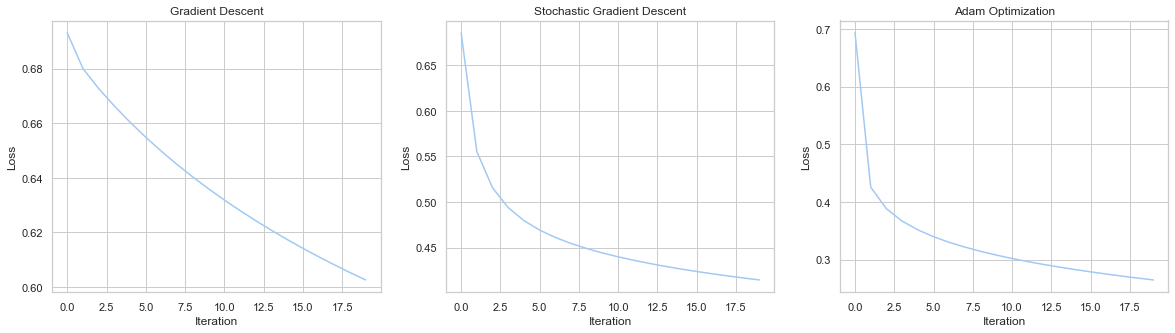

In [18]:
plot_loss(output_gd['costs'], output_sgd['costs'], output_adam['costs'])

Visualization of `Logistic Regression` loss values with `learning rate` of 0.0001.

Gradient Descent:
Train Accuracy: 57%
Test Accuracy: 59%

Stochastic Gradient Descent:
Train Accuracy: 77%
Test Accuracy: 74%

Adam Optimization:
Train Accuracy: 84%
Test Accuracy: 74%


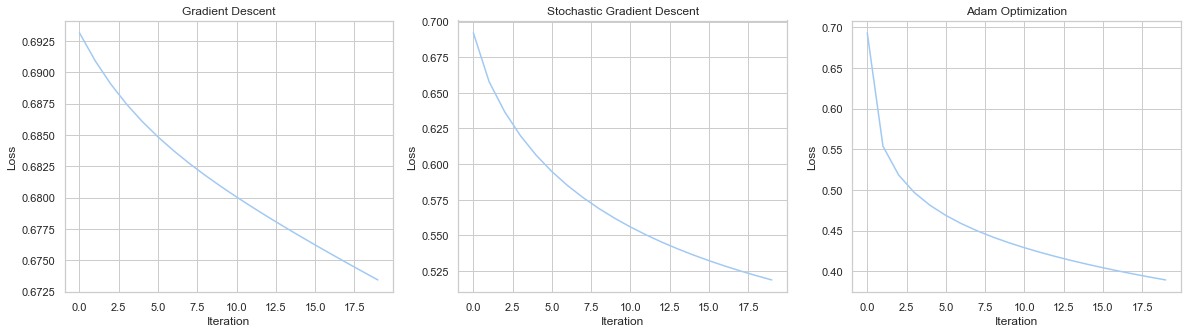

In [19]:
print('Gradient Descent:')
output_gd = model(train_x, train_y, test_x, test_y, optimizer=GD, learning_rate=0.0001, print_cost=False)
print()
print('Stochastic Gradient Descent:')
output_sgd = model(train_x, train_y, test_x, test_y, optimizer=SGD, learning_rate=0.0001, print_cost=False)
print()
print('Adam Optimization:')
output_adam = model(train_x, train_y, test_x, test_y, optimizer=Adam, learning_rate=0.0001, print_cost=False)

plot_loss(output_gd['costs'], output_sgd['costs'], output_adam['costs'])

Visualization of `Logistic Regression` loss values with `learning rate` of 0.01.

Gradient Descent:
Train Accuracy: 79%
Test Accuracy: 76%

Stochastic Gradient Descent:
Train Accuracy: 86%
Test Accuracy: 75%

Adam Optimization:
Train Accuracy: 93%
Test Accuracy: 75%


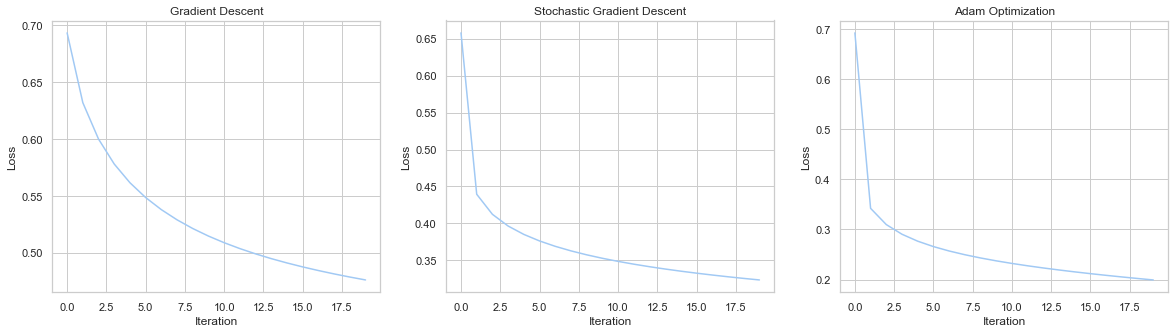

In [20]:
print('Gradient Descent:')
output_gd = model(train_x, train_y, test_x, test_y, optimizer=GD, learning_rate=0.01, print_cost=False)
print()
print('Stochastic Gradient Descent:')
output_sgd = model(train_x, train_y, test_x, test_y, optimizer=SGD, learning_rate=0.01, print_cost=False)
print()
print('Adam Optimization:')
output_adam = model(train_x, train_y, test_x, test_y, optimizer=Adam, learning_rate=0.01, print_cost=False)

plot_loss(output_gd['costs'], output_sgd['costs'], output_adam['costs'])

Visualization of `Logistic Regression` loss values with `learning rate` of 0.0025.

Gradient Descent:
Train Accuracy: 75%
Test Accuracy: 73%

Stochastic Gradient Descent:
Train Accuracy: 84%
Test Accuracy: 76%

Adam Optimization:
Train Accuracy: 91%
Test Accuracy: 76%


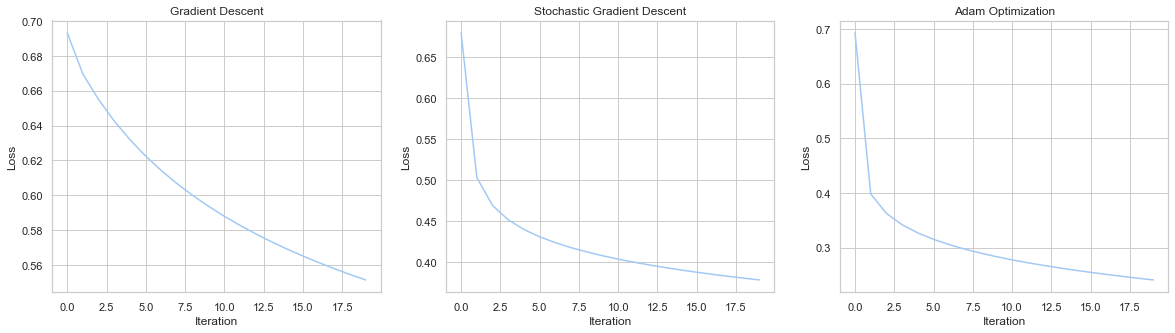

In [21]:
print('Gradient Descent:')
output_gd = model(train_x, train_y, test_x, test_y, optimizer=GD, learning_rate=0.0025, print_cost=False)
print()
print('Stochastic Gradient Descent:')
output_sgd = model(train_x, train_y, test_x, test_y, optimizer=SGD, learning_rate=0.0025, print_cost=False)
print()
print('Adam Optimization:')
output_adam = model(train_x, train_y, test_x, test_y, optimizer=Adam, learning_rate=0.0025, print_cost=False)

plot_loss(output_gd['costs'], output_sgd['costs'], output_adam['costs'])

Visualization of `Logistic Regression` loss values with `learning rate` of 0.00005.

Gradient Descent:
Train Accuracy: 54%
Test Accuracy: 56%

Stochastic Gradient Descent:
Train Accuracy: 75%
Test Accuracy: 72%

Adam Optimization:
Train Accuracy: 81%
Test Accuracy: 73%


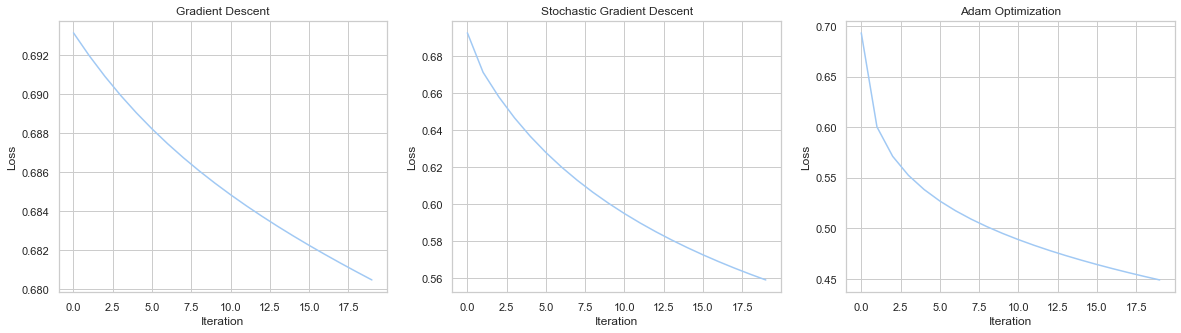

In [22]:
print('Gradient Descent:')
output_gd = model(train_x, train_y, test_x, test_y, optimizer=GD, learning_rate=0.00005, print_cost=False)
print()
print('Stochastic Gradient Descent:')
output_sgd = model(train_x, train_y, test_x, test_y, optimizer=SGD, learning_rate=0.00005, print_cost=False)
print()
print('Adam Optimization:')
output_adam = model(train_x, train_y, test_x, test_y, optimizer=Adam, learning_rate=0.00005, print_cost=False)

plot_loss(output_gd['costs'], output_sgd['costs'], output_adam['costs'])

>`Gradient Descent` optimization algorithm showed best results on the test set with `learning rate` of 0.01.
>
>`Stochastic Gradient Descent` optimization algorithm showed best results on the test set with `learning rate` of 0.0025, but led to model overfitting. Optimal `learning rate` is 0.0001.
>
>`Adam's` optimization algorithm showed best results on the test set with `learning rate` of 0.0025, but led to model overfitting. Optimal `learning rate` is 0.0001.